# 特徴量の寄与率（PCAの寄与率）：主成分

In [1]:
#Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 
from sklearn.decomposition import PCA

#Read Data
data = pd.read_csv("./01_data/Mirai.csv")
del data['TTL']
#del data['SRCIP']

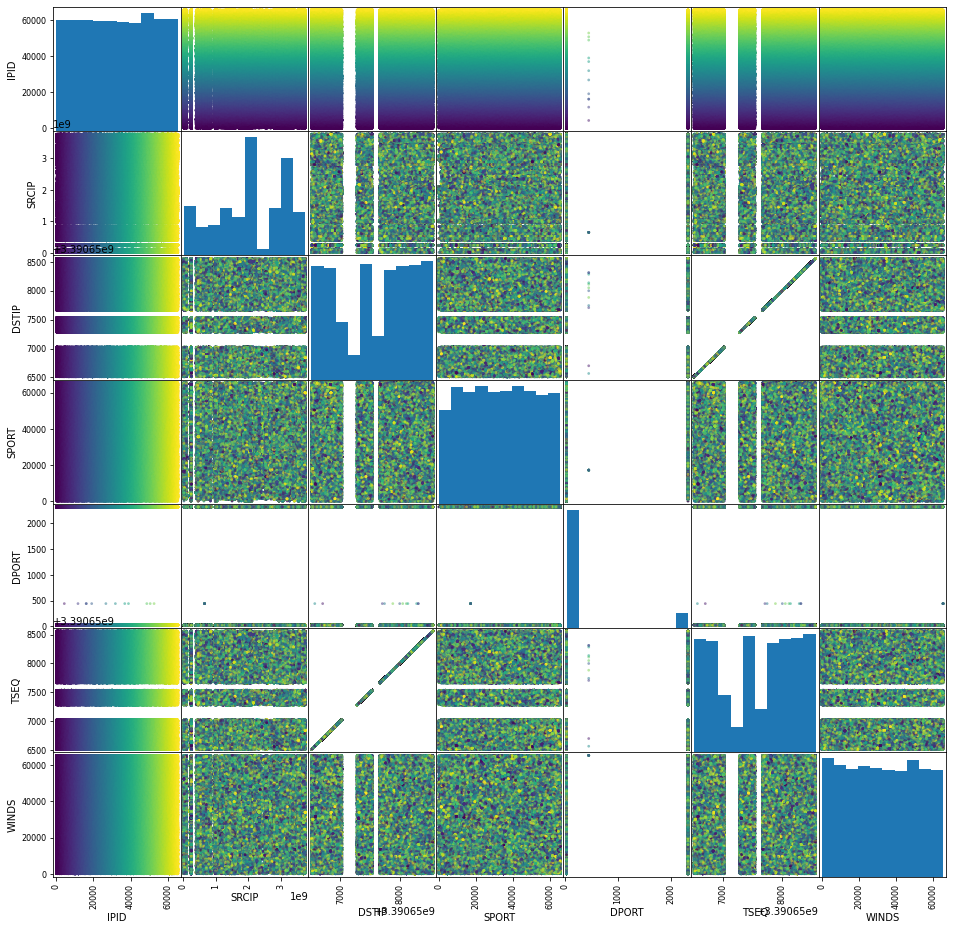

In [2]:
from pandas import plotting
plotting.scatter_matrix(data.iloc[:, 0:], figsize=(16, 16), c=list(data.iloc[:, 0]), alpha=0.5, s=30) 
#plotting.scatter_matrix(data.iloc[:, :], figsize=(16, 9), alpha=0.5, s=20) 
plt.show()

In [3]:
#行列の標準化（各列に対して、平均値を引いたものを標準偏差で割る）
dfs = data.iloc[:, 1:].apply(lambda x:(x-x.mean())/x.std(), axis=0)
#print(type(dfs))
#dfs.head()

In [4]:
#主成分分析の実行
pca = PCA()
pca.fit(dfs)
#データを主成分空間に写像
feature = pca.transform(dfs)

In [5]:
#主成分得点
#横軸が主成分（PC1, PC2, PC3,...)、縦軸が各サンプルになる

pd.DataFrame(feature, columns=["PC{}".format(x+1) for x in range(len(dfs.columns))])
#pd.DataFrame(feature, columns=["DSTIP", "SRCIP", "TSEQ", "WINDS", "SPORT"])
#.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-1.480770,2.129235,-1.470473,1.039414,-0.199960,-1.912545e-16
1,-0.358613,-1.528050,-0.186569,-0.329111,0.149691,-2.648235e-16
2,-0.407462,1.497667,-0.230527,-0.258155,-0.171560,-1.831024e-17
3,1.878188,-2.155380,-0.726629,0.226906,-0.170997,8.738699e-17
4,-0.958505,-1.478458,2.420459,1.552493,0.190007,-8.532043e-17
...,...,...,...,...,...,...
1759846,-0.940924,-1.886467,-0.154831,-0.373169,-0.546032,-5.178893e-16
1759847,-0.645389,-0.387720,0.765382,-1.331721,-1.864292,-2.864089e-16
1759848,0.610426,0.873621,-0.172704,-0.329487,-0.772722,1.318319e-16
1759849,-2.082139,-0.317063,-1.121800,0.662341,0.787152,-5.572556e-16


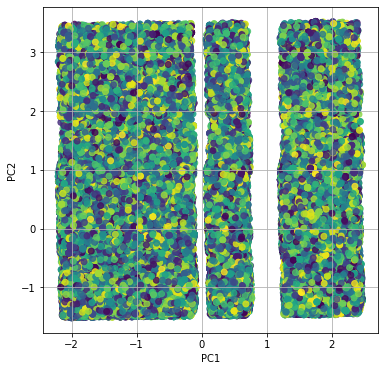

In [6]:
plt.figure(figsize=(6, 6))
plt.scatter(feature[:, 0], feature[:, 2], alpha=0.8, c=list(data.iloc[:, 0]))
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

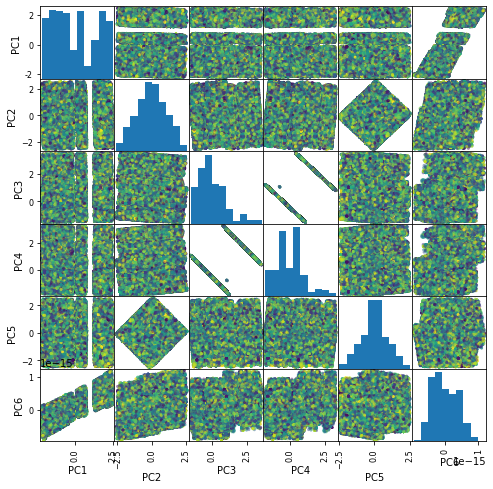

In [7]:
from pandas import plotting 
plotting.scatter_matrix(pd.DataFrame(feature, 
                        columns=["PC{}".format(x + 1) for x in range(len(dfs.columns))]), 
                        #columns=[dfs.columns]), 
                        figsize=(8, 8), c=list(data.iloc[:, 0]), alpha=0.5) 
plt.show()

In [8]:
pd.DataFrame(pca.explained_variance_ratio_, index=["PC{}".format(x + 1) for x in range(len(dfs.columns))])
#pd.DataFrame(pca.explained_variance_ratio_, index=[dfs.columns])

,0
PC1,3.334316e-01
PC2,1.894780e-01
PC3,1.685012e-01
PC4,1.646723e-01
PC5,1.439169e-01
PC6,2.135345e-32


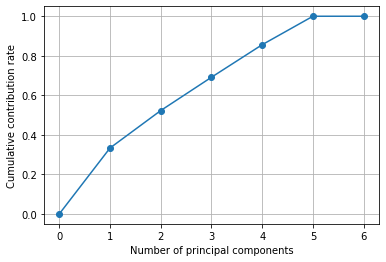

In [9]:
# 累積寄与率を図示する
import matplotlib.ticker as ticker
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution rate")
plt.grid()
plt.show()

In [50]:
# PCA の固有値
pd.DataFrame(pca.explained_variance_, index=["PC{}".format(x + 1) for x in range(len(dfs.columns))])

,0
PC1,1.357234
PC2,1.148468
PC3,0.972866
PC4,0.903988
PC5,0.617442


# 7月10日（15:11) - 未検討